### Introduction

The following data set has been retrieved from kaggle.com (https://www.kaggle.com/danielgrijalvas/movies). It was originally obtained from IMDb and includes the following information: budget, company, country, directer, genre, gross, name, rating, release date, runtime, score, movie star, votes, writer, and year. Unfortunately, budget was not provided for approximately 2000 films —all of which are removed during any analysis that includes movie budget.

It includes nearly 7,000 movies taken from the last three decades. This is a lot of data and hopefully some solid conclusions can be made from it. While this may not be every movie ever made, I dare to say that it does include a very large chunk of movies from the modern.

It was originally obtained from IMDb and includes the following information: budget, company, country, directer, genre, gross, name, rating, release date, runtime, score, movie star, votes, writer, and year.

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import seaborn as sns
from matplotlib import cm

In [25]:
df = pd.read_csv("movies.csv",encoding ='latin1')

In [26]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [27]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [28]:
#dataframe exlcuding movies withought budget
df_budget = df[df.budget !=0]
df_budget.describe()

,budget,gross,runtime,score,votes,year
count,4.638000e+03,4.638000e+03,4638.000000,4638.000000,4.638000e+03,4638.000000
mean,3.614560e+07,4.607469e+07,107.595515,6.356317,9.570254e+04,2002.489435
std,3.996947e+07,6.629378e+07,18.022792,1.011063,1.493878e+05,8.461472
min,6.000000e+03,3.090000e+02,69.000000,1.500000,1.830000e+02,1986.000000
25%,1.000000e+07,6.290905e+06,96.000000,5.800000,1.611050e+04,1996.000000
50%,2.300000e+07,2.345551e+07,104.000000,6.400000,4.394000e+04,2003.000000
75%,4.600000e+07,5.778243e+07,117.000000,7.100000,1.093932e+05,2010.000000
max,3.000000e+08,9.366622e+08,280.000000,9.300000,1.861666e+06,2016.000000


# Analyzing Movies From the Past 31 Years

Thousands of movies have been released over the past 30+ years. Some have performed poorly,  some have received rewards, and some have been just okay. They play a large role in our culture and there are a number of questions we could attempt to answer about one of these nearly 7,000 movies, but we will be focusing on 3:

**Do budget or gross play a role in movie scores? What factors affect their gross? And if budget and/or gross don't determine movie scores, what does?**

## #1 Does Budget or Gross Play a Role in Movie Scores?
##### Information on Movie Budgets
To answer our first question, let's begin by taking a look at the general budget of films. (Unfortunately, a large portion of film budgets were unprovided or unknown. As such, any portion of this analysis relating to budget has had these ~2000 movies removed.)

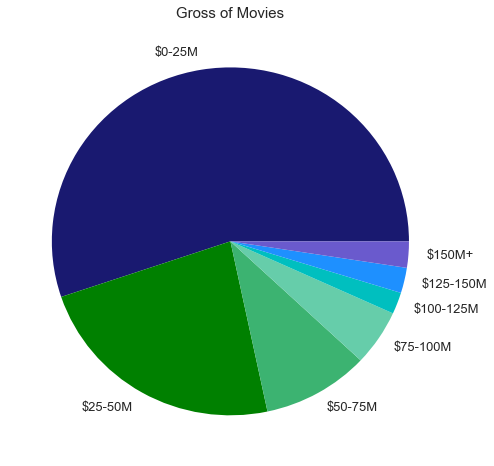

In [29]:
#budget pie chart
df['bins'] = pd.cut(df['budget'],
                    bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,300000000], 
                    labels=["$0-25M","$25-50M","$50-75M","$75-100M","$100-125M","$125-150M","$150M+"])
pie_budget = df.groupby('bins').size()
colors=(['midnightblue','green','mediumseagreen','mediumaquamarine','c','dodgerblue','slateblue'])
pie_budget.plot.pie(figsize=(8,8),colors=colors)
plt.ylabel('')
plt.title('Gross of Movies', fontsize=15)
plt.show()

You can see from the pie chart that more than half of movie have a budget less than \$25 million, nearly a quarter receive \$25-50 million, and only a small portion use a budget greater than \$150 million.

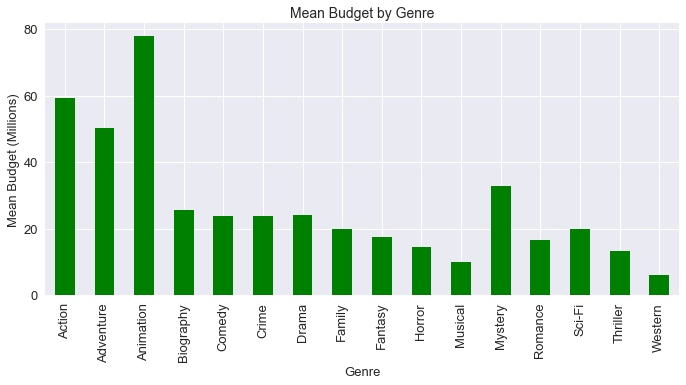

In [30]:
#genre/score
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
df_budget.groupby('genre').budget.mean().plot(kind = "bar", color = 'green')
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Mean Budget (Millions)', fontsize=13)
plt.title('Mean Budget by Genre', fontsize=14)
tick_val = [0, 20000000, 40000000, 60000000, 80000000]
tick_lab = ['0','20', '40', '60', '80']  
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

Animation movies top the charts in budget size by genre, nearing a mean budget of almost \$80 million. Action and adventure movies also have considerbly higher budgets than most other genres. Action movies have a budget average of nearly \$60 million and adventure movies ~\$50 million.

##### Information on Gross of Movies
Let's continue by familiarizing ourself with the general gross of movies.

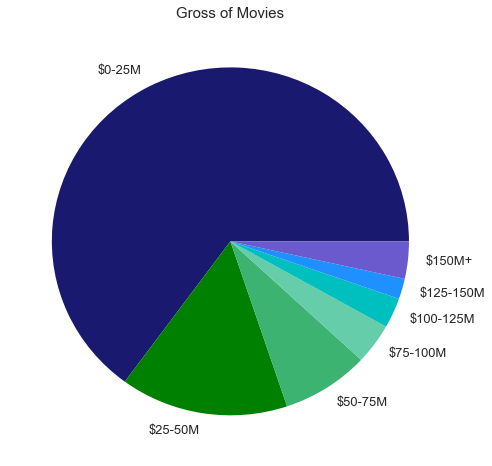

In [31]:
#budget pie chart
df['bins'] = pd.cut(df['gross'],
                    bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,300000000], 
                    labels=["$0-25M","$25-50M","$50-75M","$75-100M","$100-125M","$125-150M","$150M+"])
pie_gross = df.groupby('bins').size()
colors=(['midnightblue','green','mediumseagreen','mediumaquamarine','c','dodgerblue','slateblue'])
pie_gross.plot.pie(figsize=(8,8), colors=colors)
plt.ylabel('')
plt.title('Gross of Movies', fontsize=15)
plt.show()

As shown above, the majority of movie gross lies below $25 million. More than 1/4 of movies lie between $25 and $150 million. And a small but significant portion of movies gross over $150 million.

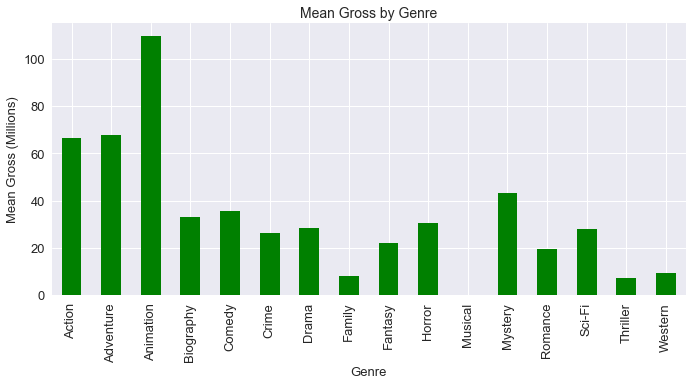

In [32]:
#genre/score
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
df_budget.groupby('genre').gross.mean().plot(kind = "bar", color = 'green')
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Mean Gross (Millions)', fontsize=13)
plt.title('Mean Gross by Genre', fontsize=14)
tick_val = [0, 20000000, 40000000, 60000000, 80000000, 100000000]
tick_lab = ['0','20', '40', '60', '80', '100']  
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

The same three genres remain at the top as the budget bar chart. Not only do the animation, action, and adventures have the highest budgets but also the highest gross.

### So do budget or gross play a role in movie scores?
We will be using scatterplots and regression lines to determine if there is a significant correlation.

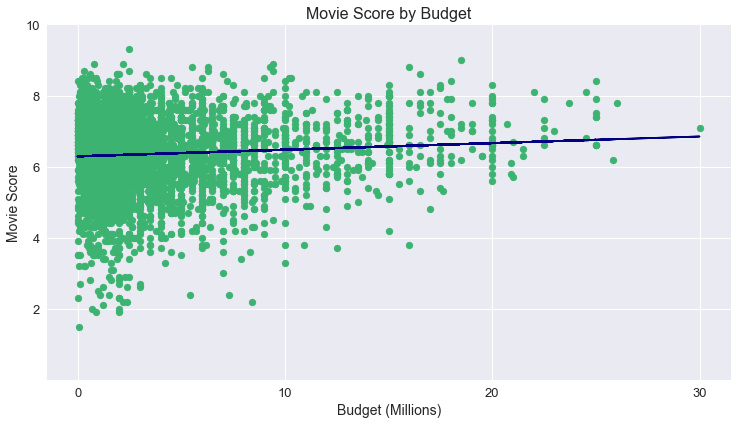

In [33]:
#budget/score scatterplot
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["score"], color = 'mediumseagreen')
plt.xlabel('Budget (Millions)', fontsize=14)
plt.ylabel('Movie Score', fontsize=14)
plt.title('Movie Score by Budget', fontsize=16)

x= df_budget["budget"]
y = df_budget["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"navy")

tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
x = [0, 100000000, 200000000, 300000000]
labels = ['0', '10', '20', '30']
plt.xticks(x, labels)

plt.tight_layout()
plt.show()

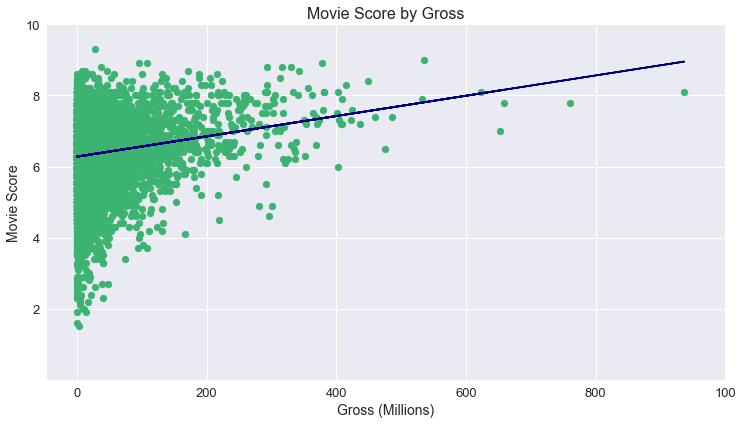

In [34]:
#gross/score scatterplot
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(df["gross"], df["score"], color = 'mediumseagreen')
plt.xlabel('Gross (Millions)', fontsize=14)
plt.ylabel('Movie Score', fontsize=14)
plt.title('Movie Score by Gross', fontsize=16)

x= df["gross"]
y = df["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"navy")

tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
x = [0, 200000000, 400000000, 600000000, 800000000, 1000000000]
labels = ['0', '200', '400', '600', '800', '100']
plt.xticks(x, labels)


plt.tight_layout()
plt.show()

The mean score for movies is 6.4, ranging from a score as low as 1.5 to upwards of 9.3 (out a scale of 10).

Movie budget mean is \$24.6 million and the movie gross mean is \$33.5 million.

There appears to be no significant correlation between budget and movies scores.

But there most certainly is a positive correlation between movie gross and score. This does not necessarily imply that the high gross causes a high score. But it does mean that the more a movie grosses, the higher probability it has of receiving a better score.

**Answer to Question #1:** Budget doesn't play a role in movie scores. Gross and movies scores are positively correlated!

## #2 What Does Determine Movie Scores?

We've discovered that there is a correlation between gross of movies and their scores. But there is no correlation between budget and movie scores. Perhaps there are other factors that affect movie scores. Let's begin by checking whether genre or release date play an important role in the outcome of movie scores.

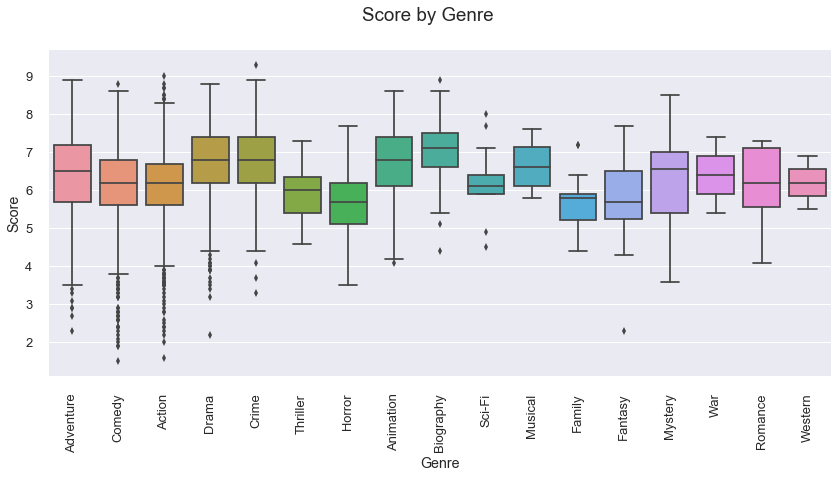

In [35]:
#genre/score boxplot
sns.set(font_scale = 1.3)
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
ax = sns.boxplot(x='genre',y='score',data=df)  
plt.suptitle('Score by Genre')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Genre', ylabel='Score')
plt.xticks(rotation=90)
plt.show()

While there is high a range of scores among genres and a large number of outliers, there does't appear to be any obvious correlation between movie genres and their mean scores.

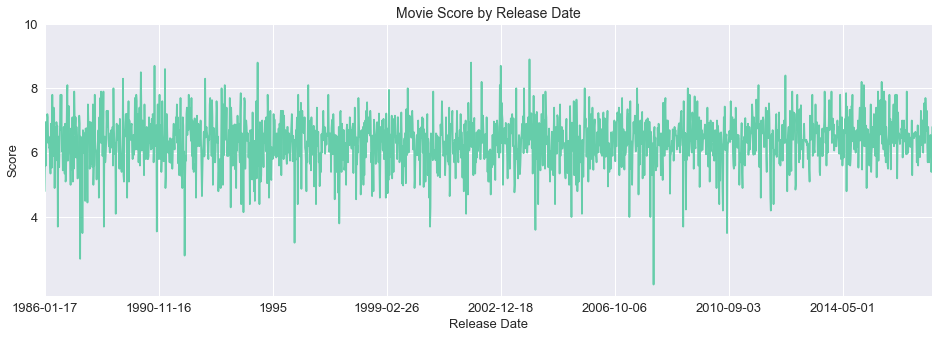

In [36]:
#release date/score
plt.figure(figsize=(35,5))
plt.subplot(1, 2, 1)
df_budget.groupby('released').score.mean().plot(kind = "line", color = 'mediumaquamarine')
plt.xlabel('Release Date', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('Movie Score by Release Date', fontsize=14)
tick_val = [4, 6, 8, 10]
tick_lab = ['4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.show()

Release date does not seem to directly affect movies scores. While there are varying scores every year, the mean still tends to surround a score of 6.4.

### Creating a histogram to determine distribution of scores.
Could the writer, director, star actor, or company determine a higher movie score? Let's take the top ~20 occurances of writers, directors, stars, and companies (larger population allowing for more realistic testing) and compare their mean scores to one another to determine this. We can be accomplished by using a t-test, but it must first determine that the distribution of scores is normal by creating a histogram.

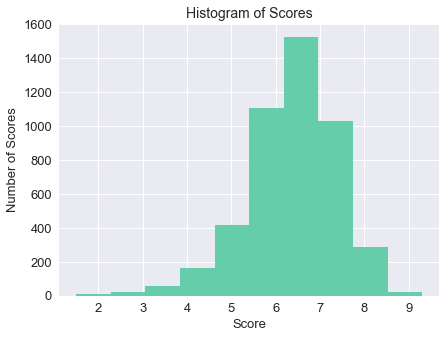

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(df_budget["score"], color = 'mediumaquamarine')
plt.xlabel('Score', fontsize=13)
plt.ylabel('Number of Scores', fontsize=13)
plt.title('Histogram of Scores', fontsize=14)
plt.show()

Based off the "Histogram of Scores" we can conclude that the distribution is normal —because of the bell shape of the graph. There is a small tail off to the left but not significant enough to cause the graph to be considered skewed left. Because of this normality, we can continue on to creating bar graphs and performing t-tests. We will first conduct t-tests comparing writers and directors. Second, we will compare movies stars and companies. (A t-value and p-value will be provided below each second graph.)

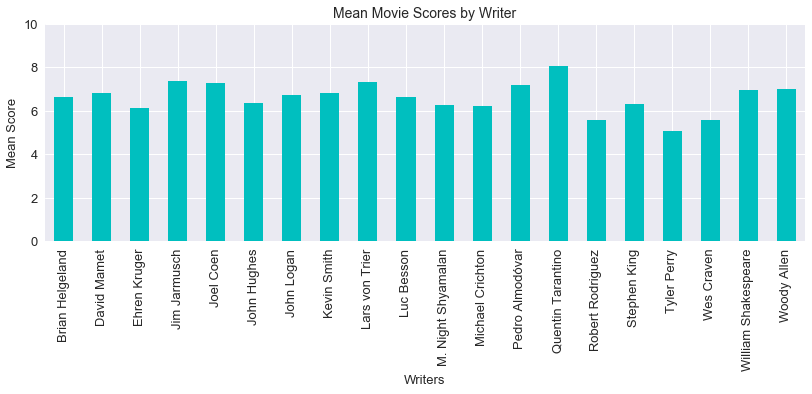

In [38]:
#create new dataframe including: writer, mean score, and count
df2 = df.groupby('writer').mean()['score'].reset_index()
df3 = df.writer.value_counts().reset_index().rename(columns={'index': 'writerz', 'writer': 'count'})
df3 = df3.sort_values(by ='writerz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['writerz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_writers = df4.reset_index(drop=True)
df_writers = df4_writers[df4_writers['count']>9]

#bar chart of writer/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_writers.groupby('writer').score.mean().plot(kind = "bar", color = 'c')
plt.xlabel('Writers', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Scores by Writer', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

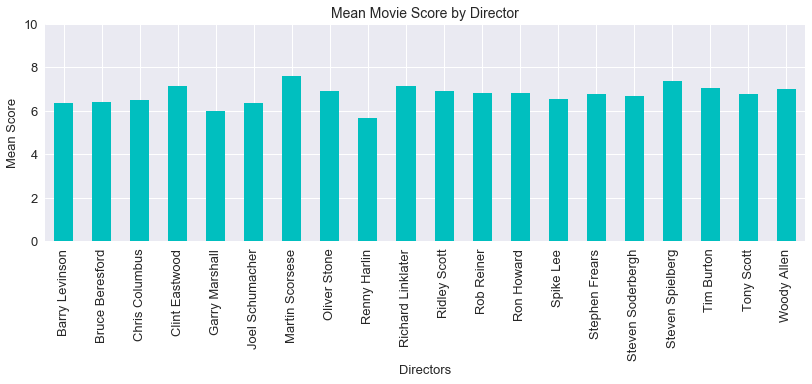

Results of T-Test
T-Value = -0.067  P-Value = 0.507


In [39]:
#create new dataframe including: director, mean score, and count
df2 = df.groupby('director').mean()['score'].reset_index()
df3 = df.director.value_counts().reset_index().rename(columns={'index': 'directorz', 'director': 'count'})
df3 = df3.sort_values(by ='directorz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['directorz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_directors = df4.reset_index(drop=True)
df_directors = df4_directors[df4_directors['count']>14]

#bar chart of director/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_directors.groupby('director').score.mean().plot(kind = "bar", color = 'c')
plt.xlabel('Directors', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Score by Director', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()
(ttest_ind(df_writers['score'], df_directors['score'], equal_var=False))
print("Results of T-Test")
print("T-Value = -0.067  P-Value = 0.507")

When comparing the mean scores of the stop 20 writers with mean scores of the top 20 directors we receive a t-vlaue of -0.067 and a p-value of 0.0507. Unfortunately, beause our p-value is so high we cannot make any significant conclusions based of our t-value. What does occur is that the incredibly high p-value causes us to assume that the null hypothesis is true (the opposite of what we suggested is true). Thus we can assume that there is NO significant difference in score between the top 20 writers and the top 20 directors.

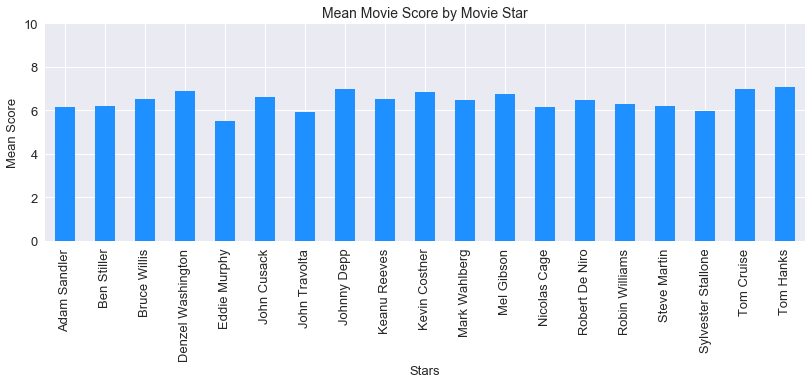

In [40]:
#create new dataframe including: star, mean score, and count
df2 = df.groupby('star').mean()['score'].reset_index()
df3 = df.star.value_counts().reset_index().rename(columns={'index': 'starz', 'star': 'count'})
df3 = df3.sort_values(by ='starz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['starz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_stars = df4.reset_index(drop=True)
df_stars = df4_stars[df4_stars['count']>22]

#bar chart of star/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_stars.groupby('star').score.mean().plot(kind = "bar", color = 'dodgerblue')
plt.xlabel('Stars', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Score by Movie Star', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

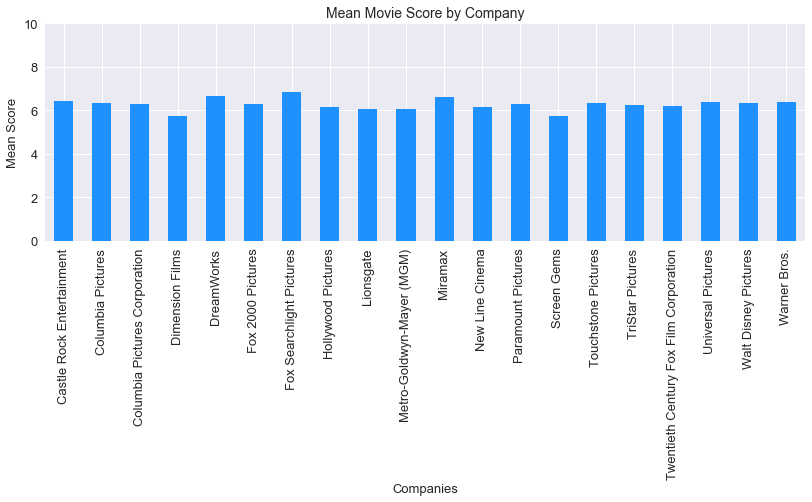

Results of T-Test
T-Value = -1.612  P-Value = 0.117


In [41]:
#create new dataframe including: company, mean score, and count
df2 = df.groupby('company').mean()['score'].reset_index()
df3 = df.company.value_counts().reset_index().rename(columns={'index': 'companyz', 'company': 'count'})
df3 = df3.sort_values(by ='companyz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['companyz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_companies = df4.reset_index(drop=True)
df_companies = df4_companies[df4_companies['count']>40]

#bar chart of company/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_companies.groupby('company').score.mean().plot(kind = "bar", color = 'dodgerblue')
plt.xlabel('Companies', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Score by Company', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()
(ttest_ind(df_stars['score'], df_companies['score'], equal_var=False))
print("Results of T-Test")
print("T-Value = -1.612  P-Value = 0.117")

Performing a t-test comparing movie stars and companies gives a t-value of -1.612 and a p-value of 0.117. Once again we can see that the p-value is too high to use our t-value to make any significant conclusions (a p-value is required to be .05 or less). Again we can accept the null hypothesis and assume that the mean movie scores of the top 20 stars are not significantly different than the top 20 companies.

### Are there any significant results from comparing other groups?

Perhaps there are other groups, when compared, that will result in a small enough p-value to allow us to use the t-value (instead of causing us to instantly accept the null hypothesis). A chart has been provided showing the results of the six possible t-tests, which includes those that have already been peformed).

In [42]:
#all t-tests, "print" can be added to beginning of each line to see results
(ttest_ind(df_writers['score'], df_directors['score'], equal_var=False))
(ttest_ind(df_writers['score'], df_stars['score'], equal_var=False))
(ttest_ind(df_writers['score'], df_companies['score'], equal_var=False))
(ttest_ind(df_directors['score'], df_stars['score'], equal_var=False))
(ttest_ind(df_directors['score'], df_companies['score'], equal_var=False))
(ttest_ind(df_stars['score'], df_companies['score'], equal_var=False))

#creating pandas chart including t-values and p-values
group_array = np.array([[-0.67,0.5073],[0.9,0.3748],[2.068,0.0495],[2.085,0.044],[4.023,0.0004],[1.612,0.1175]])
df_groups = pd.DataFrame(group_array)

#labeling
df_groups.index = ['Writers vs Directors','Writers vs Stars','Writers vs Companies',
                     'Directors vs Stars','Directors vs Companies', 'Stars vs Companies']
df_groups.columns = ['T-Value','P-Value']
df_groups

,T-Value,P-Value
Writers vs Directors,-0.670,0.5073
Writers vs Stars,0.900,0.3748
Writers vs Companies,2.068,0.0495
Directors vs Stars,2.085,0.0440
Directors vs Companies,4.023,0.0004
Stars vs Companies,1.612,0.1175


It appears that there are some p-values that are small enough! There are three t-tests that result in a p-value greater than .05 and three tests that result in a p-value less than five.

The three tests that have a p-value less than .05 are: Writers vs Companies, Directors vs Stars, and Directors vs Companies.

Writers vs Companies has a t-value of 2.068. This provides us with sufficient information to say that the mean score of the top 20 writers is greater than the mean score of the top 20 companies. In fact, it puts the mean score of writers more than two standard errors above the mean score of companies (over 47.7% higher, beyond the 97.7th percentile).

Directors vs Stars has a t-value of 2.085. These results are very similar to the comparison of writers vs companies. Simply put it means: The mean score of the top directors is two standard errors above the mean score of the top stars, placing it more than 47.7% higher.

Directors vs Companies has a t-value of 4.023. This is a significant difference in means, allowing us to conclude that the mean score of the top 20 directors is far above the mean score of the top 20 companies. We can say this with even greater confidence since our p-value is miniscule: 0.0004. The mean score of top directors is more than four standard errors above the mean score of top companies. The difference is so large that the mean score of top directors sits more than 49.994% above the mean score of top companies (beyond the 99.994th percentile)!

**Answer to Question #2:** The mean score of the top 20 writers is higher than the mean score of the top 20 companies. The mean score of the top 20 directors is higher than the mean score of the top 20 movie stars. The mean score of the top 20 directors is significantly higher than the mean score of the top 20 companies.

## #3 What Factors Affect Movie Gross?

Scores are a powerful indicator of movie success, but we all know it's really about the money. So let's see what the greatest factors are in producing a higher movie gross.

We've talked A LOT about movie gross and movies budget. Let's put the two together and see if higher budget inputs tend to output a higher gross.

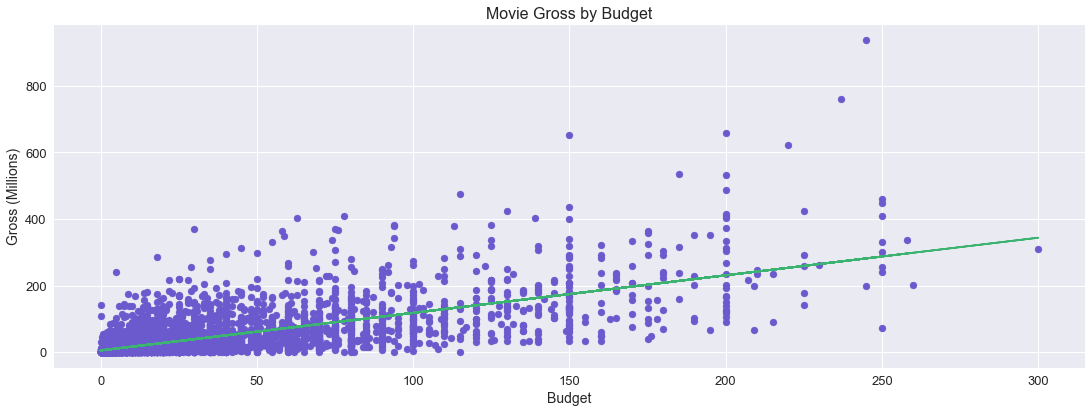

In [43]:
#budget/gross scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["gross"], color = 'slateblue')
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Gross (Millions)', fontsize=14)
plt.title('Movie Gross by Budget', fontsize=16)

tick_val = [0, 200000000, 400000000, 600000000, 800000000]
tick_lab = ['0','200', '400', '600', '800'] 
plt.yticks(tick_val, tick_lab, fontsize=13)
x = [0, 50000000, 100000000, 150000000, 200000000, 250000000, 300000000]
labels = ['0', '50', '100', '150', '200', '250', '300']
plt.xticks(x, labels)

x= df_budget["budget"]
y = df_budget["gross"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"mediumseagreen")

plt.tight_layout()
plt.show()

The trend is very clear in this scatterplot: budgets and gross are correlated. If you're seeking a higher gross then you'll want to have a higher budget.

Moving on; let's see if the country, rating, or runtime have any correlation with the gross of movies.

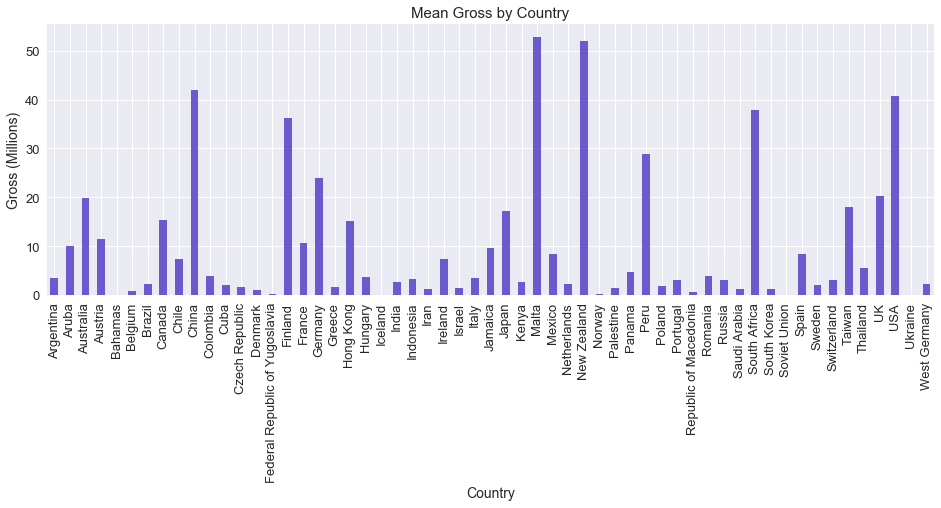

In [44]:
#gross/country
plt.figure(figsize=(35,5))
plt.subplot(1, 2, 1)
df.groupby('country').gross.mean().plot(kind = "bar", color = 'slateblue')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Gross (Millions)', fontsize=14)
plt.title('Mean Gross by Country', fontsize=15)
tick_val = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
tick_lab = ['0','10', '20', '30', '40', '50'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

Evidently, movies filmed in specific countries tend to have a much higher gross. The top six countries with the highest gross mean, in descending order, being: Malta (a tiny country in Europe), New Zealand, China, USA, South Africa, and Finland.

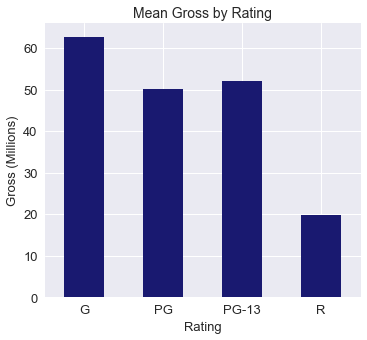

In [45]:
#Gross/Rating
df_rating = df.loc[~df['rating'].isin(['B', 'B15', 'NC-17', 'NOT RATED', 
                                       'Not specified', 'TV-14', 'TV-MA', 'TV-PG', 'UNRATED'])]
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
df_rating.groupby('rating').gross.mean().plot(kind = "bar", color = 'midnightblue')
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Gross (Millions)', fontsize=13)
plt.title('Mean Gross by Rating', fontsize=14)
tick_val = [0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000]
tick_lab = ['0','10', '20', '30', '40', '50', '60'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=0)
plt.tight_layout()

The higest grossing films tend to be rated "G." The lowest grossing films tend to be rated "R." Perhaps the largest reason for this is due to rated "R" films limiting their viewership. Whether that is because of the >17 age restrication or the moral values of individuals.

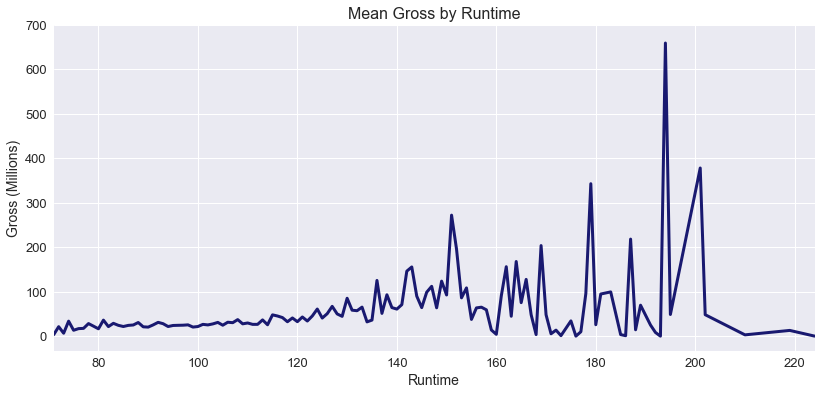

In [46]:
#Gross/Runtime
df1 = df[df['runtime'] >70]
df2 = df1[df1['runtime'] <230]
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
df2.groupby('runtime').gross.mean().plot(kind = "line", color = 'midnightblue', linewidth=3.0)
plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Gross (Millions)', fontsize=14)
plt.title('Mean Gross by Runtime', fontsize=16)
tick_val = [0, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000]
tick_lab = ['0','100', '200', '300', '400', '500', '600', '700'] 
plt.yticks(tick_val, tick_lab)
plt.show()

Movie length is of vital importance in determining it's gross. It is apparent in the graph above that the "sweet spot" for movie time sits somewhere between 140 and 210 minutes.

**Answer to Question #3:** Higher budgets tend to produce a higher gross. The top six countries for highest movie gross are: Malta, New Zealand, China, USA, South Africa, and Finland. "G" rated movies are the highest grossing. Movies between 140-210 minutes have a higher gross.

### Further Research
The questions we could ask about this dataset seem to be limitless. In the future one could ask questions such as: What kind of movies are associated with what runtime? What incluence do votes have on movie scores? Or one could delve deeper into the question already asked by creating smaller boundaries. (ex. correlation of score based on runtime of a specific genre, gross based on a company's budget, etc.) I encourage others to make new questions and enhance the answers I have already attempted to provide.